In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep = ';',  encoding= 'latin1')
df.info()
df.head(5)

In [ ]:
#Analisar a evolução dos registros de estelionato na cidade do Rio de Janeiro.

df_RJ = df.loc[(df['munic'] == 'Rio de Janeiro')]
df_estl = df_RJ.groupby(['ano'])['estelionato'].sum().reset_index()
df_estl = df_estl.sort_values(by = 'ano').reset_index()
df_estl

In [ ]:
df_estl['ano']=df_estl['ano'].astype(str)

In [ ]:
df_array_estl = np.array(df_estl['estelionato'])

In [ ]:
media_estl = np.mean(df_array_estl)
media_estl


In [ ]:
mediana_estl = np.median(df_array_estl)
mediana_estl

In [ ]:
distancia = (media_estl - mediana_estl)/mediana_estl
distancia


In [ ]:
print(f"MÉDIA = {media_estl:.2f}\nMEDIANA = {mediana_estl:.2f}\nDISTÂNCIA = {distancia:.2f}")

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(df_estl['ano'], df_estl['estelionato'], marker='o', linestyle='-')

plt.title('evolução dos registros de estelionato na cidade do Rio de Janeiro')
plt.xlabel('Ano')
plt.ylabel('Estelionato')
#plt.grid(True) #Não é recomendado utilizar Grids para visualizaçõa de dados
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
df_estl.plot(kind='bar' , x= 'ano', y= 'estelionato')
plt.title('evolução dos registros de estelionato na cidade do Rio de Janeiro')
plt.xlabel('Ano')
plt.ylabel('Estelionato')
plt.tight_layout()
plt.show()

In [34]:
df_dlg = df_RJ.groupby(['cisp'])['estelionato'].sum().reset_index()
df_dlg = df_dlg.sort_values(by = 'estelionato').reset_index()
df_dlg

,index,cisp,estelionato
0,41,45,98
1,7,11,1246
2,4,7,2071
3,39,43,5695
4,27,31,6194
5,40,44,6335
6,36,40,6459
7,13,17,6691
8,1,4,6789
9,3,6,7089


In [39]:
df_array_del = np.array(df_dlg['estelionato'])

q1 = np.percentile(df_dlg, 25)
q2 = np.percentile(df_dlg, 50)
q3 = np.percentile(df_dlg, 75)

In [36]:
print(f"Q1={q1}\nQ2={q2}\nQ3={q3}")

Q1=17.25
Q2=33.0
Q3=7173.75


In [37]:
df_dlg_q3 = df_dlg.loc[(df_dlg['estelionato'] >= q3 )]

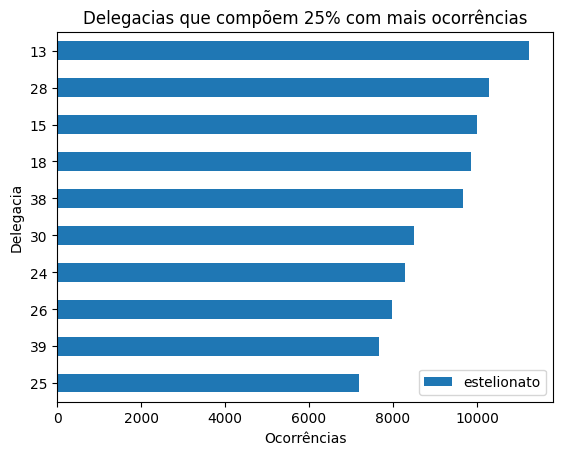

In [42]:
df_dlg_q3.head(10).plot(kind='barh' , x= 'cisp', y= 'estelionato')
plt.xlabel('Ocorrências')
plt.ylabel('Delegacia')
plt.title('Delegacias que compõem 25% com mais ocorrências')
plt.show()